In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json

In [3]:
results_json_32_path = os.path.join(os.getcwd(), "32x32x32", "results.json")
results_json_64_path = os.path.join(os.getcwd(), "64x64x64", "results.json")
results_json_128_path = os.path.join(os.getcwd(), "128x128x128", "results.json")

with open(results_json_32_path) as f:
    results_32 = json.load(f)
    
with open(results_json_64_path) as f:
    results_64 = json.load(f)
    
with open(results_json_128_path) as f:
    results_128 = json.load(f)

In [55]:
def plot_overall_results(ax, results_32, results_64, results_128, data_axis, ylabel, title):
    epochs = [i for i in range(1, 21)]
    ax.plot(epochs, results_32["overall"][data_axis], label="Net 32")
    ax.plot(epochs, results_64["overall"][data_axis], label="Net 64")
    ax.plot(epochs, results_128["overall"][data_axis], label="Net 128")

    ax.set_xlabel("Epoch")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc="upper right")

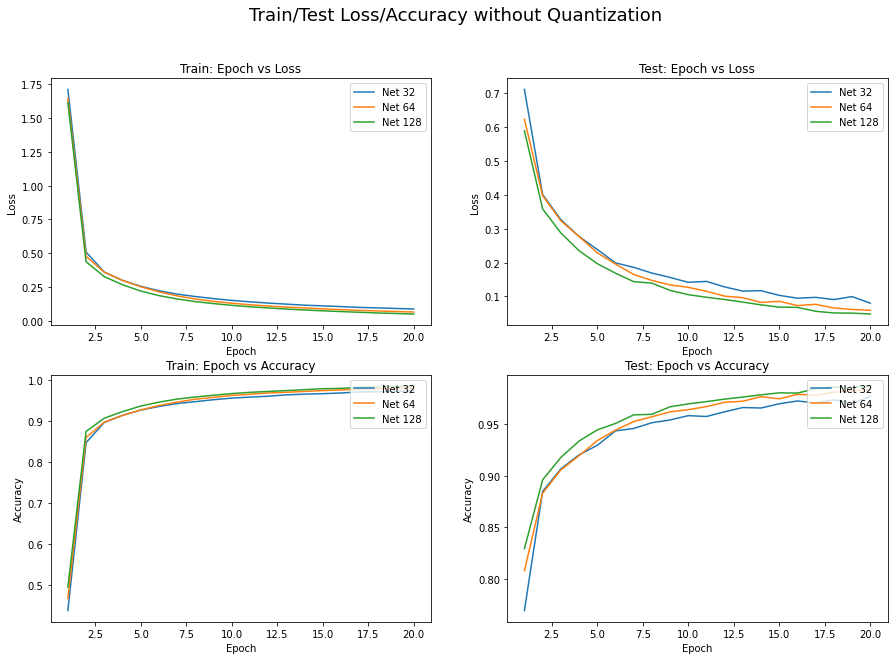

In [56]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 10)
                    
plot_overall_results(axs[0,0],
                     results_32, 
                     results_64, 
                     results_128, 
                     "train_losses", 
                     "Loss",
                     "Train: Epoch vs Loss")

plot_overall_results(axs[0,1],
                     results_32, 
                     results_64, 
                     results_128, 
                     "test_losses", 
                     "Loss",
                     "Test: Epoch vs Loss")

plot_overall_results(axs[1,0],
                     results_32, 
                     results_64, 
                     results_128, 
                     "train_accs", 
                     "Accuracy",
                     "Train: Epoch vs Accuracy")

plot_overall_results(axs[1,1],
                     results_32, 
                     results_64, 
                     results_128, 
                     "test_accs", 
                     "Accuracy",
                     "Test: Epoch vs Accuracy")

plt.suptitle("Train/Test Loss/Accuracy without Quantization", size=18)
plt.show()

In [48]:
def plot_layer_results(ax, results, data_axis, layer_num, ylabel, title):
    q_schemes = results["q_schemes"]
    layer_name = "layer_" + str(layer_num)
    for q_scheme, data in q_schemes.items():
        layer_data = data[layer_name]
        if q_scheme == "affine":
            label = "Affine"
        if q_scheme == "kl_div":
            label = "KL Div"
        if q_scheme == "scale":
            label = "Scale"
        if q_scheme == "no":
            label = "No Q"
        ax.plot(layer_data["perturb_amts"], layer_data[data_axis], "--", alpha=0.5, label=label)
    
    ax.set_xlabel("Perturb Delta")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend(loc="upper right")

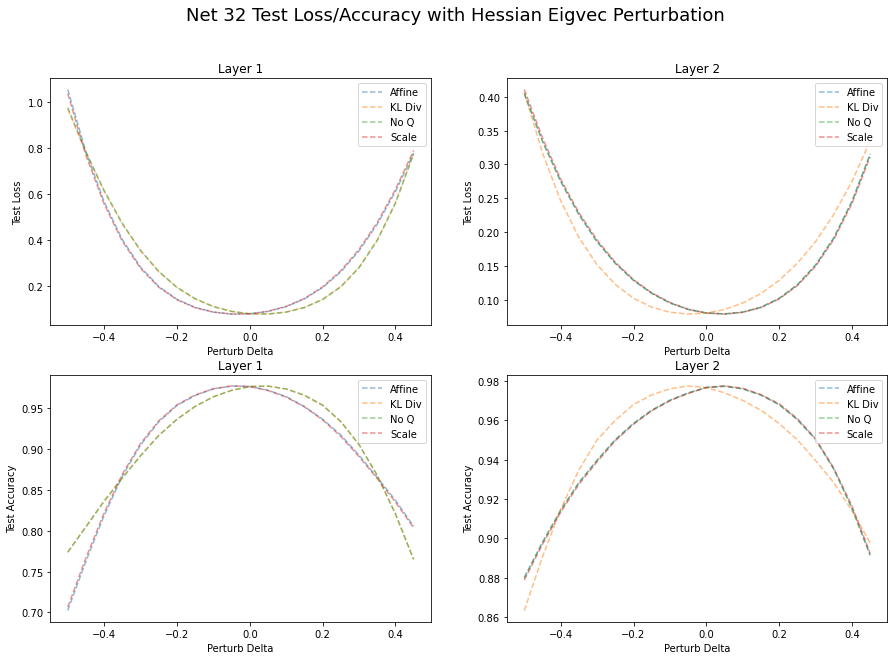

In [53]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 10)

plot_layer_results(axs[0,0],
                   results_32, 
                   "perturb_losses", 
                   1,
                   "Test Loss", 
                   "Layer 1")

plot_layer_results(axs[0,1],
                   results_32, 
                   "perturb_losses", 
                   2,
                   "Test Loss", 
                   "Layer 2")

plot_layer_results(axs[1,0],
                   results_32, 
                   "perturb_accs", 
                   1,
                   "Test Accuracy", 
                   "Layer 1")

plot_layer_results(axs[1,1],
                   results_32, 
                   "perturb_accs", 
                   2,
                   "Test Accuracy", 
                   "Layer 2")

plt.suptitle("Net 32 Test Loss/Accuracy with Hessian Eigvec Perturbation", size=18)
plt.show()

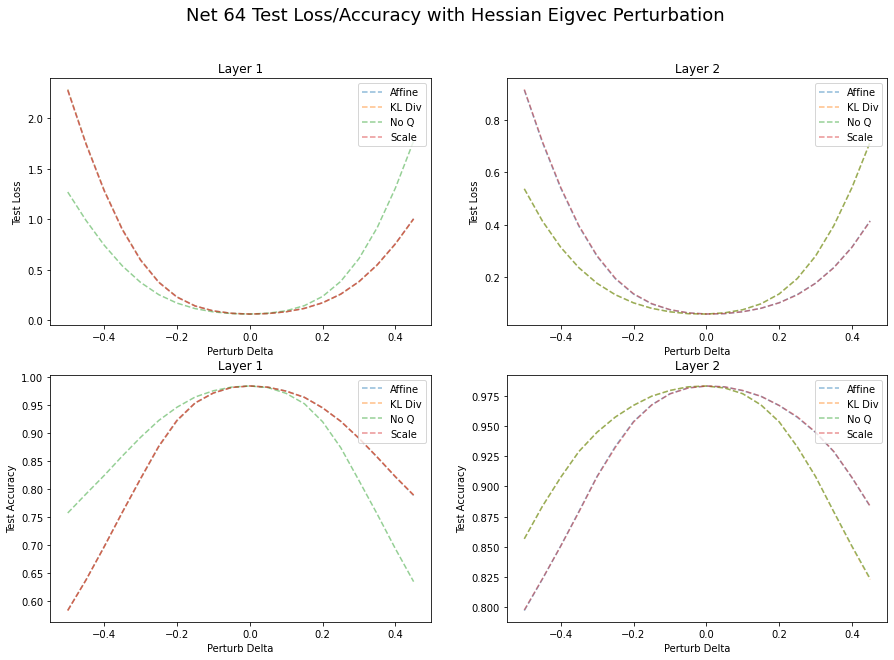

In [57]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 10)

plot_layer_results(axs[0,0],
                   results_64, 
                   "perturb_losses", 
                   1,
                   "Test Loss", 
                   "Layer 1")

plot_layer_results(axs[0,1],
                   results_64, 
                   "perturb_losses", 
                   2,
                   "Test Loss", 
                   "Layer 2")

plot_layer_results(axs[1,0],
                   results_64, 
                   "perturb_accs", 
                   1,
                   "Test Accuracy", 
                   "Layer 1")

plot_layer_results(axs[1,1],
                   results_64, 
                   "perturb_accs", 
                   2,
                   "Test Accuracy", 
                   "Layer 2")

plt.suptitle("Net 64 Test Loss/Accuracy with Hessian Eigvec Perturbation", size=18)
plt.show()

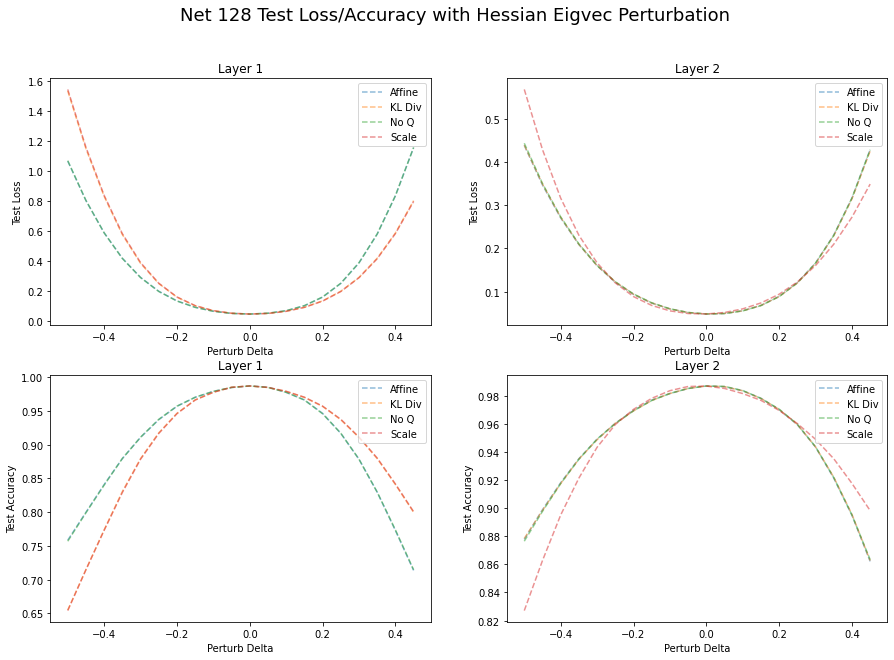

In [54]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(15, 10)

plot_layer_results(axs[0,0],
                   results_128, 
                   "perturb_losses", 
                   1,
                   "Test Loss", 
                   "Layer 1")

plot_layer_results(axs[0,1],
                   results_128, 
                   "perturb_losses", 
                   2,
                   "Test Loss", 
                   "Layer 2")

plot_layer_results(axs[1,0],
                   results_128, 
                   "perturb_accs", 
                   1,
                   "Test Accuracy", 
                   "Layer 1")

plot_layer_results(axs[1,1],
                   results_128, 
                   "perturb_accs", 
                   2,
                   "Test Accuracy", 
                   "Layer 2")

plt.suptitle("Net 128 Test Loss/Accuracy with Hessian Eigvec Perturbation", size=18)
plt.show()

In [70]:
def get_top_eigval_df(results):
    top_eigval_dict = dict()
    
    q_schemes = results["q_schemes"]
    for q_scheme, layer_datas in q_schemes.items():
        if q_scheme == "affine":
            label = "Affine"
        if q_scheme == "kl_div":
            label = "KL Div"
        if q_scheme == "scale":
            label = "Scale"
        if q_scheme == "no":
            label = "No Q"
        top_eigval_dict[label] = [layer_datas["layer_1"]["top_eigval"], layer_datas["layer_2"]["top_eigval"]]
        
    df = pd.DataFrame.from_dict(top_eigval_dict)
    df.index = ["Layer 1", "Layer 2"]
    return df

In [71]:
get_top_eigval_df(results_32)

,Affine,KL Div,No Q,Scale
Layer 1,3.679460,3.673920,3.673813,3.691137
Layer 2,1.579721,1.586212,1.583673,1.584811


In [72]:
get_top_eigval_df(results_64)

,Affine,KL Div,No Q,Scale
Layer 1,4.730843,4.730044,4.753503,4.698220
Layer 2,2.322573,2.322223,2.326828,2.335728


In [73]:
get_top_eigval_df(results_128)

,Affine,KL Div,No Q,Scale
Layer 1,3.787115,3.777390,3.779036,3.777425
Layer 2,1.819146,1.818378,1.819279,1.814575
